In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ruta = r"C:\Users\mariadiaz\EDA_Dataset\DatasetTelegramLibro.xlsx"
df = pd.read_excel(ruta)

In [ ]:
# Creación de un dataframe
df = pd.DataFrame({"Subscribers":[100, 200,300,400,500], "y": [15, 25, 45,60,75]})
df.head()

,Subscribers,y
0,100,15
1,200,25
2,300,45
3,400,60
4,500,75


## Gráficos rápidos con pandas

<Axes: >

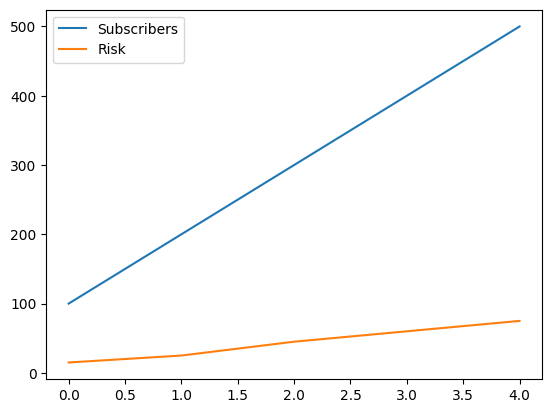

In [13]:
df.plot()


<Axes: >

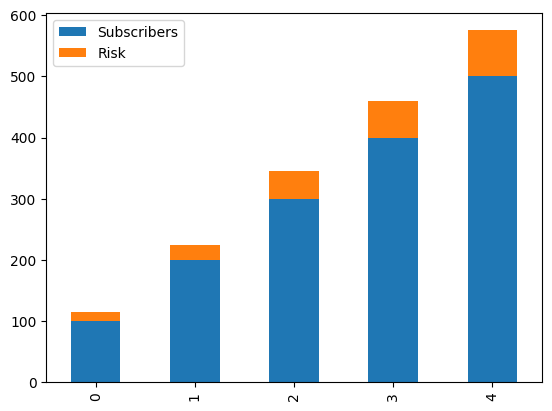

In [15]:
df.plot(kind="bar", stacked=True)

<Axes: xlabel='Subscribers'>

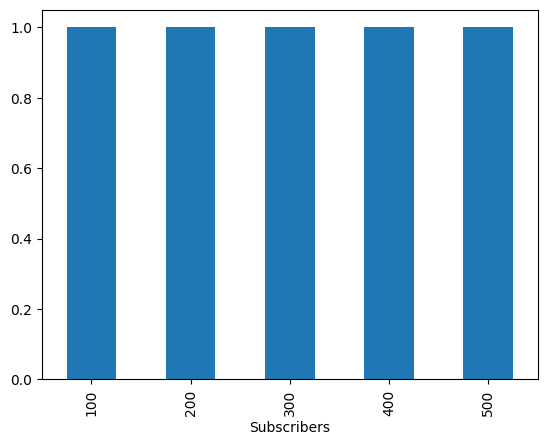

In [22]:
df.Subscribers.value_counts().plot(kind="bar")

### HISTOGRAMAS
Representación en barras de la frecuencia de aparición de una variable

Text(0.5, 1.0, 'PRUEBA')

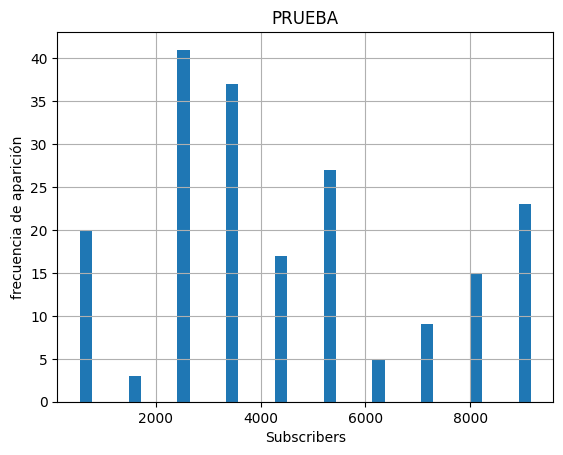

In [24]:
plt.hist(df.Subscribers, histtype='bar', bins= 10, rwidth=0.25)
plt.grid(True)
plt.xlabel('Subscribers')
plt.ylabel('frecuencia de aparición')
plt.title('PRUEBA')

### SCATTER PLOT = DIAGRAMA DE DISPERSIÓN
Mostrar los valores de dos variables para un conjunto de datos


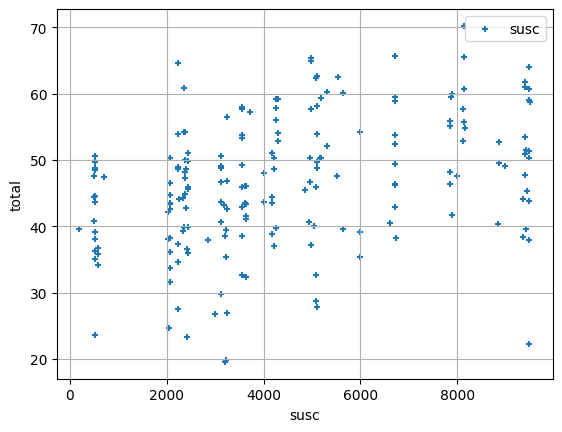

In [39]:
plt.scatter(df.Subscribers, df.TOTAL, label="susc", marker='+', s=20)
plt.grid(True)
plt.xlabel('susc')
plt.ylabel('total')
plt.legend()

### PIE CHART (GRÁFICO CIRCULLAR)

([<matplotlib.patches.Wedge at 0x2c026058b00>,
 [Text(0.8940249101470402, 0.64087398140085, '0'),
  Text(-0.5449282886851696, 0.9555381521376594, '1'),
  Text(-1.0388909499100838, -0.3615322865179869, '2'),
  Text(-0.166011381985982, -1.0874006718092022, '3'),
  Text(0.9140068919665902, -0.6120387254394726, '4')])

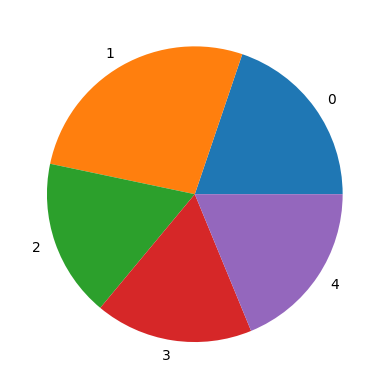

In [77]:
PS=[0,1,2,3,4]
x=[39,53,34,34,37]
plt.pie(x, labels=PS)

#### RESPRESENTACIÓNES EN 3D

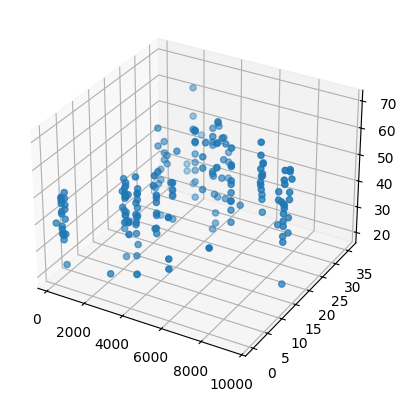

In [118]:
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')


ax.scatter3D(df.Subscribers, df.Engagement_rate, df.TOTAL)


<Axes: xlabel='VIP_credentials'>

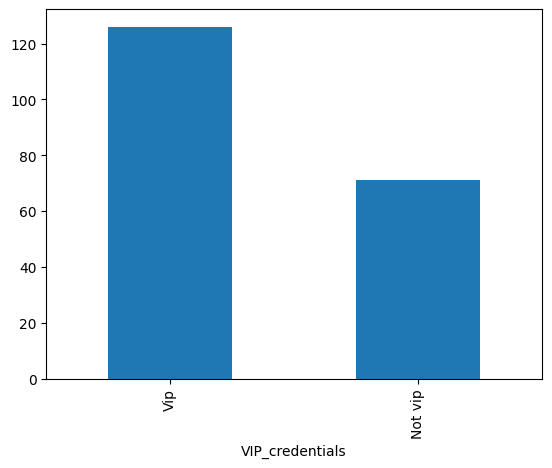

In [107]:
diccionario = {'Vip':1, 'Not vip':0}
binario = df['VIP_credentials'].map(diccionario)
df['VIP_credentials_bin'] = binario

df.VIP_credentials.value_counts().plot(kind="bar")

#### TABLAS CRUZADAS y Diagramas de tablas cruzadas

In [109]:
pd.crosstab(df.VIP_group, df.User_status)

User_status,Active,Inactive
VIP_group,,
Ceo,8,3
Ciber,102,1
Directiva,9,3
Otros,50,21


<Axes: xlabel='VIP_group'>

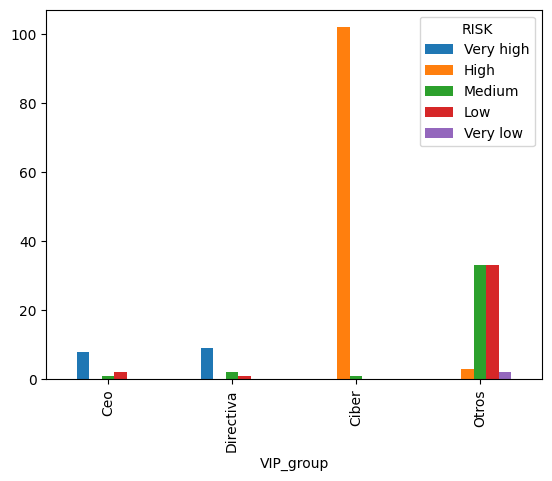

In [141]:
vip_group_order = ['Ceo', 'Directiva', 'Ciber', 'Otros']  # Reemplaza con tus categorías y orden deseado
df['VIP_group'] = pd.Categorical(df['VIP_group'], categories=vip_group_order, ordered=True)

pd.crosstab(df.VIP_group, df.RISK).plot(kind="bar")

#### GROUP BY : Seleccionar información concreta
Sirve para representar la información de manera individual de todas las opciones combinando dos variables

En el fondo es como ver la misma información de la tabla cruzada pero de forma más detallada, individualizada

In [142]:
df.groupby("VIP_group").RISK.value_counts()


C:\Users\mariadiaz\AppData\Local\Temp\ipykernel_12360\606748856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("VIP_group").RISK.value_counts()


VIP_group  RISK     
Ceo        Very high      8
           Low            2
           Medium         1
           High           0
           Very low       0
Directiva  Very high      9
           Medium         2
           Low            1
           High           0
           Very low       0
Ciber      High         102
           Medium         1
           Very high      0
           Low            0
           Very low       0
Otros      Medium        33
           Low           33
           High           3
           Very low       2
           Very high      0
Name: count, dtype: int64

C:\Users\mariadiaz\AppData\Local\Temp\ipykernel_12360\2942322960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("VIP_group").RISK.value_counts().plot(kind="bar")


<Axes: xlabel='VIP_group,RISK'>

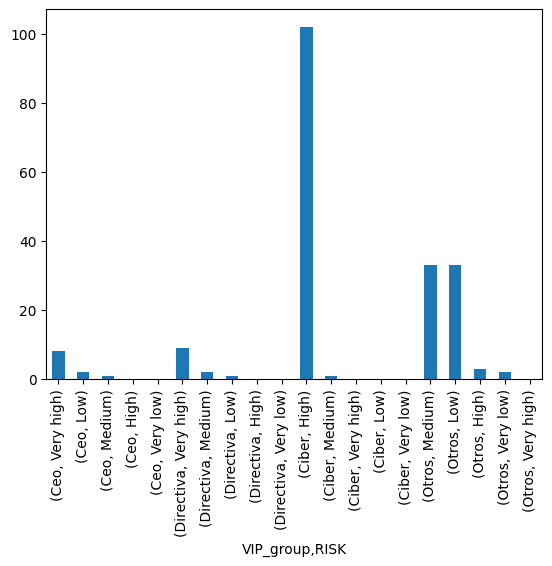

In [143]:
df.groupby("VIP_group").RISK.value_counts().plot(kind="bar")

### Matriz de correlación

In [152]:
#Dejamos solo las columnas de tipo numerico significativas
df_nums=df.copy()
df_nums=df_nums.select_dtypes(include='number')
df_nums=df_nums.drop(columns=['VIP_credentials_bin'])
df_nums=df_nums.drop(columns=['Muestra_ID'])
df_nums

,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Results_file,TOTAL
0,0,12.00,1.000000e+11,4,78.66,8845,17.58,21,2,10,1,40.38
1,2000,4.00,1.000100e+03,1,18.80,9393,15.52,25,2,11,1,47.67
2,7,6.62,4.144000e+05,2,32.90,2340,19.61,21,3,7,1,44.34
3,13277,2.31,2.030000e+01,0,18.80,508,1.00,1,1,1,1,44.43
4,0,8.00,1.000000e+07,2,47.63,7852,18.89,68,13,14,1,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,8.00,1.000000e+07,2,47.63,5096,17.12,161,4,4,8,58.12
193,0,11.80,6.720000e+10,4,78.66,2244,32.57,3,2,3,8,48.64
194,4186,3.00,1.000000e+02,0,14.10,8129,16.30,74,12,14,8,65.57
195,3508324,0.84,7.000000e-01,0,16.51,4974,23.13,260,9,3,8,65.42


In [153]:
coef=df_nums.corr(method='pearson')
coef

,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Results_file,TOTAL
Leaked_password,1.000000,-0.169106,-0.007470,-0.135579,-0.125875,-0.059827,0.151517,-0.031279,-0.023172,-0.033242,0.060061,0.045329
Guesses_discover,-0.169106,1.000000,0.165772,0.966111,0.880529,-0.059551,-0.133821,-0.038547,-0.000937,-0.137363,-0.020062,-0.477171
Cracking_time,-0.007470,0.165772,1.000000,0.110696,0.178219,-0.035489,-0.055646,-0.042335,0.118522,-0.057505,0.017885,-0.043866
Password_strength,-0.135579,0.966111,0.110696,1.000000,0.877373,-0.050110,-0.118458,-0.024716,-0.060067,-0.130109,0.005452,-0.483214
Password_entropy,-0.125875,0.880529,0.178219,0.877373,1.000000,-0.021398,-0.091468,-0.023615,0.036192,-0.094052,0.030364,-0.417949
Subscribers,-0.059827,-0.059551,-0.035489,-0.050110,-0.021398,1.000000,0.294921,0.007609,-0.065487,0.734760,0.039081,0.356500
Engagement_rate,0.151517,-0.133821,-0.055646,-0.118458,-0.091468,0.294921,1.000000,0.069565,0.218611,0.400477,-0.036921,0.285660
Mentions,-0.031279,-0.038547,-0.042335,-0.024716,-0.023615,0.007609,0.069565,1.000000,-0.087160,-0.169682,0.067953,0.129427
Posts_day,-0.023172,-0.000937,0.118522,-0.060067,0.036192,-0.065487,0.218611,-0.087160,1.000000,-0.205205,-0.009993,0.081924
Reposts,-0.033242,-0.137363,-0.057505,-0.130109,-0.094052,0.734760,0.400477,-0.169682,-0.205205,1.000000,-0.088563,0.328327


En la columna TOTAL vemos el índice de correlación de todas las variables respecto a TOTAL. Aquellas con valor negativo representan variables de relación inversa, estas son por ejemplo la de entropía (cuanta mayor entropía, menos riesgo - tiene sentido).

Cuanto más cercano a 1 o -1 sea el valor, más fuerte es la correlación entre variables (aplicable a toda la matriz)

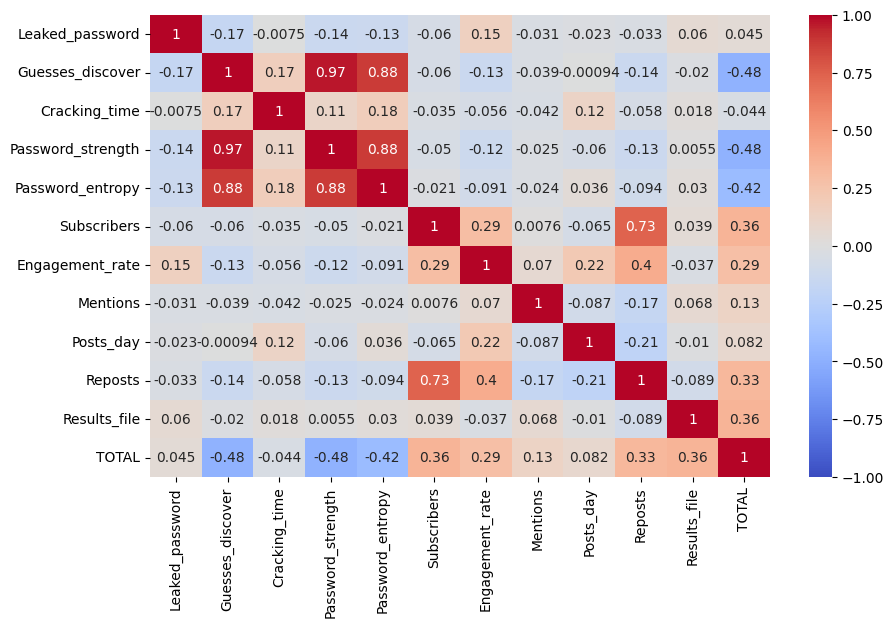

In [159]:
plt.figure(figsize=(10,6))
sns.heatmap(coef, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0)
plt.show()

### Filtrar el Dataframe

In [160]:
group='Ceo'
dff = df[df.VIP_group == group]
dff

,Muestra_ID,USERNAME,VIP_credentials,VIP_group,User_status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password_update,Password_type,Leaked_password,Password_pattern,Guesses_discover,Cracking_time,Password_strength,Password_entropy,CHANNEL_NAME,Chat_type,Channel_privacity,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,FILE_NAME,Results_file,Country_file_name,TOTAL,RISK,VIP_credentials_bin
13,6.1,alfredoestirado@telebot.com,Vip,Ceo,Active,genesis,289ffeb2a745ccf51ca89a297f47e382,aeebad4a796fcc2e15dc4c6061b45ed9b373f26adfc798...,9fad20395a815a68752128454ca2fc17538a5e03178c04...,fe10566e2adeece8faf585a8fbd5db896e4a60f7,Not actual,Personal password,107057,Dictionary,2.64,4.390000e+01,0,32.90,[ REBREND ],Channel,Public,7853,18.89,68,13,14,Other,665K.txt,1,Other,55.93,Very high,1
20,15.2,albertoestirado@telebot.com,Vip,Ceo,Active,root_passwd,b1a1fafe8b0646549268848ce701a6b2,9c513711aee180fa77be12a154ace1a2de852c2158bdba...,29ec77dabaadf79c7f2f733307e24d552c7254131843a3...,7550e6c9136e931e5e4ab7e91ed22c0afeadfa37,Not actual,Personal password,0,Bruteforce,8.60,4.066592e+07,3,64.44,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Channel,Public,4183,7.67,149,18,1,Other,234K.txt,2,Other,44.37,Very high,1
27,13.2,alfredoestirado@telebot.com,Vip,Ceo,Active,lalala,9aa6e5f2256c17d2d430b100032b997c,3f29e1b2b05f8371595dc761fed8e8b37544b38d56dfce...,5de85b3bfca67759817023968c454864b1c74c27f26ca0...,df2efa060e335f97628ca39c9fef5469ab3cb837,Not actual,Personal password,176960,Repeats,2.48,3.040000e+01,0,28.20,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Channel,Public,4183,7.67,149,18,1,Other,665K.txt,2,Other,51.05,Very high,1
43,37.1,alfredoestirado@telebot.com,Vip,Ceo,Active,supernic.cn,ddb927476eee4e0e85742d88bdca1c7a,e9e24b61afbf7ede18334b5718b17e78d3d1bf994324c9...,7e93bdef6b355d3d7a586c0e0c7177a6570a3a86d4f14a...,1be8c8694b9bddd2eb27923928bffea8cddbf254,Not actual,Personal password,5,Sequence,9.05,1.126010e+08,3,64.44,Fr33 D4t4,Channel,Public,3201,7.06,15,14,1,Other,665K.txt,1,Other,38.55,Very high,1
65,22.2,alfredoestirado@telebot.com,Vip,Ceo,Active,sys,36bcbb801f5052739af8220c6ea51434,518b67e652531c5fe7e25d6b2c3b4ef6224e7d90da2091...,0a67db7f97aeccbbad8cede443d8cba9cd66d3935d47be...,b4c56ee8d2854166dec66644f541b85247105b2c,Not actual,Personal password,4415,Bruteforce,3.00,1.001000e+02,0,14.10,Group,Channel,Public,2356,19.82,21,2,8,Other,EU.txt,3,Europe,54.21,Very high,1
67,23.1,alfredoestirado@telebot.com,Vip,Ceo,Active,root1234567,cb1d025fc0d5a9a04c75b1a56593d8ea,55a89fc6666352763ebdeedc323c44ad6f050e6bab62ca...,1d415557e0ac091c9731861ede62d900d964aa8d8a33bf...,02be4d57999261838cebe45ec83ba6c1beb1457a,Not actual,Personal password,30,Dictionary,5.21,1.637000e+04,1,56.87,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Channel,Public,4216,7.46,149,20,1,Other,USA.txt,3,Other,50.30,Very high,1
87,29.3,luciaruiz@telebot.com,Vip,Ceo,Inactive,G/K.^(\I^O,0a5607963fe5400950451d2e3d9e8d24,0d1b95d09f420df6d829376f8452a72ea445fe7043d489...,15ca4f92eb2f06c765c5e85ceea6c63b2df1ed7c7973fa...,bae83a9c547781c6dd2852c0683ac342587620fd,Not actual,Personal password,0,Bruteforce,10.00,1.000000e+09,3,58.58,GODELESS CLOUD,Channel,Public,9482,14.88,25,1,12,Other,Spn.txt,4,Other,37.99,Low,1
98,30.2,alfredoestirado@telebot.com,Vip,Ceo,Active,jupiter,27a5148ea0fbddae22d902bea9a19531,1e9cc37678c0112d7a394909256c2a5998a6e57e2b0d82...,9fcc535147715e1c709dd3617c6bafa48ec4d59ba4620d...,a2f7fcb5afeb7983ffbb6ce3d1a7e91edf321350,Not actual,Personal password,85978,Dictionary,2.72,5.230000e+01,0,52.00,HQ COMBO | FRESH BASES | VALID COMBO LIST,Channel,Public,3126,8.25,5,48,1,Other,665K.txt,4,Other,50.61,Very high,1
131,41.4,alfredoestirado@telebot.com,Vip,Ceo,Active,NbfQ5NmX,b3af2789753bb5c36b2f6fb2e13362ca,3847a0e25e401f49e398fcbd8c2da1a1b672aabda02344...,65418b3669bfd1b420dc9ae2ecd0038fa498e08523793a...,b0a73042d8f0b3cceb3781759e48565e2d3f37d5,Not actual,Personal password,0,Bruteforce,8.00,1.000000e+07,2,47.63,Daily Combolist [ Backup ],Channel,Public,5529,20.83,21,8,12,Other,Spain.txt,5,Spain,62.49,Very high,1
167,47.6,luc

In [162]:
dff = dff[["CHANNEL_NAME", "VIP_group", "Subscribers"]]
dff

,CHANNEL_NAME,VIP_group,Subscribers
13,[ REBREND ],Ceo,7853
20,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Ceo,4183
27,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Ceo,4183
43,Fr33 D4t4,Ceo,3201
65,Group,Ceo,2356
67,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Ceo,4216
87,GODELESS CLOUD,Ceo,9482
98,HQ COMBO | FRESH BASES | VALID COMBO LIST,Ceo,3126
131,Daily Combolist [ Backup ],Ceo,5529
167,Fresh Combo mails,Ceo,2071


In [168]:
channel_counts = df["CHANNEL_NAME"].value_counts().reset_index()
channel_counts.columns = ["CHANNEL_NAME", "Frequency"]
channel_counts

,CHANNEL_NAME,Frequency
0,Group,20
1,NoName_Cloud,18
2,[ REBREND ],14
3,GODELESS CLOUD,12
4,Cloudata FREE Databases ComboLists,11
5,⚡️ NinjaByte ⚡️,11
6,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,11
7,Fresh Combo mails,11
8,Databases World🔰,11
9,URL:USER:PASS CLOUD,11


In [181]:
df = df[['Leaked_password', 'Subscribers', 'Mentions', 'Posts_day', 'Reposts', 'Results_file', 'Guesses_discover', 'Cracking_time', 'Password_entropy', 'Engagement_rate', 'TOTAL', 'RISK']]
df.iloc[:,0]



0            0
1         2000
2            7
3        13277
4            0
        ...   
192          0
193          0
194       4186
195    3508324
196          0
Name: Leaked_password, Length: 197, dtype: int64

In [190]:
risk_list=['High']
dff = df[df.RISK.isin(risk_list)]
# dff = dataframe todos risk=high
risk='High'
dft = dff[dff.RISK == risk].reset_index()
dft = dft.T
dft.index[1:3]
# dft.iloc[3:5, 0]

Index(['Leaked_password', 'Subscribers'], dtype='object')